In [19]:
import pandas as pd
import os
import shutil

In [15]:
df_train = pd.read_csv('train2/data_train.csv')
df_test = pd.read_csv('test2/data_test.csv')

df_train.drop(columns=['path'])
df_test.drop(columns=['path'])

,filename,label,int_label
0,00_home_281,Erythroleukoplakia,1
1,00_0597dc42-IMG_20190430_213250,Erythroleukoplakia,1
2,00_762814ab-IMG_20190501_063959,Erythroleukoplakia,1
3,9_DSCN0173,Erythroleukoplakia,1
4,00_11fe2a47-SAVE_20200202_122110,Erythroleukoplakia,1
...,...,...,...
132,00_DSCN9823_2,Ulcer,5
133,00_a82b6c1b-20220915_184545,Ulcer,5
134,00_DSCN9819_2,Ulcer,5
135,97_DSCN9757,Ulcer,5


In [12]:
counts_all = df_train['label'].value_counts()
counts_all

label
Tumor                 69
Leukoplakia           67
Ulcer                 50
Erythroleukoplakia    43
Name: count, dtype: int64

In [8]:
counts_all = df_test['label'].value_counts()
counts_all

label
Leukoplakia           50
Ulcer                 41
Tumor                 28
Erythroleukoplakia    18
Name: count, dtype: int64

In [21]:
df_org = pd.read_csv('../data/data.csv', index_col='filename')
df_org

,label,tag,int_label,image_path
filename,,,,
00_DSCN9645_2,Leukoplakia,train,3,data/train/Leukoplakia/00_DSCN9645_2.jpg
00_20d5f703-IMG_20190430_213225,Erythroleukoplakia,train,1,data/train/Erythroleukoplakia/00_20d5f703-IMG_...
109_DSCN9487,Ulcer,train,5,data/train/Ulcer/109_DSCN9487.jpg
137_DSCN0889,Leukoplakia,train,3,data/train/Leukoplakia/137_DSCN0889.jpg
46_DSCN9587,Leukoplakia,train,3,data/train/Leukoplakia/46_DSCN9587.jpg
...,...,...,...,...
116_IMG_4433,Erythroplakia,train,0,data/train/Erythroplakia/116_IMG_4433.jpg
82_DSCN6927,Ulcer,test,5,data/test/Ulcer/82_DSCN6927.jpg
81_DSCN0848,Leukoplakia,test,3,data/test/Leukoplakia/81_DSCN0848.jpg


In [20]:
labels = list(set(df_test['label'].to_list()))
print(labels)

for lab in labels:
    os.mkdir('train2/' + lab)
    os.mkdir('test2/' + lab)

['Erythroleukoplakia', 'Ulcer', 'Leukoplakia', 'Tumor']


In [36]:
train_path = []
for filename, lab in zip(df_train['filename'], df_train['label']):
    img_path = f'train/{lab}/{filename}.jpg'
    shutil.copy2(f"../{df_org.loc[filename]['image_path']}", img_path)
    train_path.append('data_balanced/' + img_path)

test_path = []
for filename, lab in zip(df_test['filename'], df_test['label']):
    img_path = f'test/{lab}/{filename}.jpg'
    shutil.copy2(f"../{df_org.loc[filename]['image_path']}", img_path)
    test_path.append('data_balanced/' + img_path)

In [37]:
df_train['image_path'] = train_path
df_test['image_path'] = test_path

In [34]:
Erythroleukoplakia = os.listdir('train/Erythroleukoplakia')
Ulcer = os.listdir('train/Ulcer')
Leukoplakia = os.listdir('train/Leukoplakia')
Tumor = os.listdir('train/Tumor')
len(Erythroleukoplakia), len(Ulcer), len(Leukoplakia), len(Tumor)

(43, 50, 67, 69)

In [41]:
counts_all = df_org['label'].value_counts()
counts_train = df_train['label'].value_counts()
counts_test = df_test['label'].value_counts()

print('Original',counts_all, 'train', counts_train, 'test', counts_test, sep='\n*********\n')

Original
*********
label
Leukoplakia           382
Ulcer                 257
Tumor                  97
Erythroleukoplakia     61
Keratosis              48
Erythroplakia          29
Name: count, dtype: int64
*********
train
*********
label
Tumor                 69
Leukoplakia           67
Ulcer                 50
Erythroleukoplakia    43
Name: count, dtype: int64
*********
test
*********
label
Leukoplakia           50
Ulcer                 41
Tumor                 28
Erythroleukoplakia    18
Name: count, dtype: int64


/tmp/ipykernel_82763/2519976382.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.text(i,counts_all[i],counts_all[i])
/tmp/ipykernel_82763/2519976382.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.text(i,counts_train[i],counts_train[i])
/tmp/ipykernel_82763/2519976382.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.text(i,counts_test[i],counts_test[i])


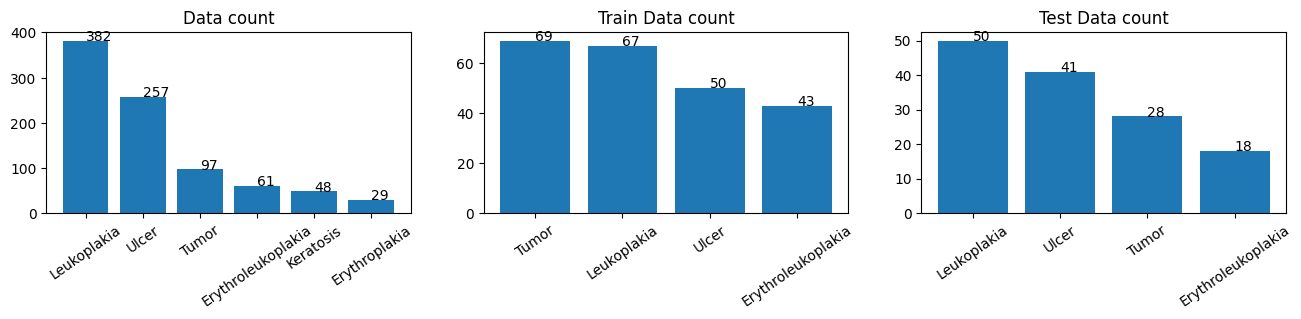

In [42]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

gs = GridSpec(3, 3)
fig = plt.figure(figsize=(16, 8))

# All data
ax1 = fig.add_subplot(gs[0,0])
ax1.bar(counts_all.keys(), counts_all)
for i in range(len(counts_all.keys())):
    ax1.text(i,counts_all[i],counts_all[i])
ax1.set_xticks(range(len(counts_all.keys())))
ax1.set_xticklabels(counts_all.keys())
ax1.tick_params(axis='x', rotation=35)
ax1.set_title('Data count')

# train data
ax2 = fig.add_subplot(gs[0,1])
ax2.bar(counts_train.keys(), counts_train)
for i in range(len(counts_train.keys())):
    ax2.text(i,counts_train[i],counts_train[i])
ax2.set_xticks(range(len(counts_train.keys())))
ax2.set_xticklabels(counts_train.keys())
ax2.tick_params(axis='x', rotation=35)
ax2.set_title('Train Data count')

# test data
ax3 = fig.add_subplot(gs[0,2])
ax3.bar(counts_test.keys(), counts_test)
for i in range(len(counts_test.keys())):
    ax3.text(i,counts_test[i],counts_test[i])
ax3.set_xticks(range(len(counts_test.keys())))
ax3.set_xticklabels(counts_test.keys())
ax3.tick_params(axis='x', rotation=35)
ax3.set_title('Test Data count')

plt.show()